# Gráficas de tiempo y relaciones

## Prompting

C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\346804568.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_t = cm.get_cmap("cool", len(metodos))
C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\346804568.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_r = cm.get_cmap("winter", len(metodos))


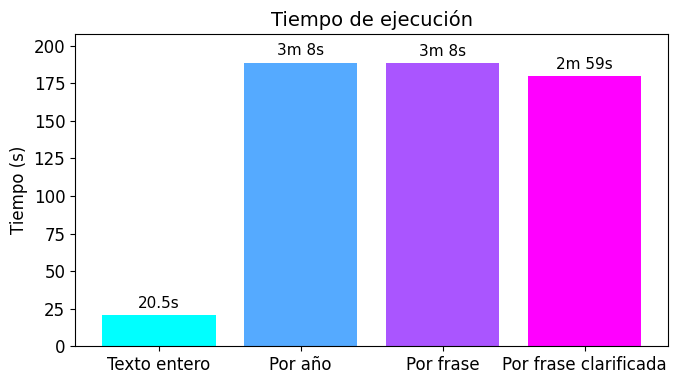

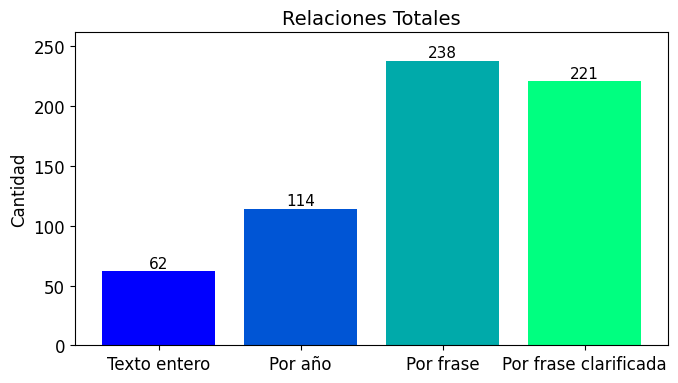

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
tiempos_promting = [20.5, 188.6, 188.3, 179.7]  # segundos
relaciones_prompting = [62, 114, 238, 221]

# Función para formatear tiempo
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f}s"
    m = int(seconds // 60)
    s = int(seconds % 60)
    return f"{m}m {s}s"

# Colores
cmap_t = cm.get_cmap("cool", len(metodos))
colores_tiempo = [cmap_t(i) for i in range(len(metodos))]
cmap_r = cm.get_cmap("winter", len(metodos))
colores_relaciones = [cmap_r(i) for i in range(len(metodos))]

# --- Figura 1: Tiempo de ejecución ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, tiempos_promting, color=colores_tiempo)
plt.title("Tiempo de ejecución", fontsize=14)
plt.ylabel("Tiempo (s)", fontsize=12)
plt.ylim(0, max(tiempos_promting) * 1.1)
for i, t in enumerate(tiempos_promting):
    plt.text(i, t + 5, format_time(t), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/prompting/prompting_tiempo_ejecucion.png")
plt.show()

# --- Figura 2: Relaciones totales ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, relaciones_prompting, color=colores_relaciones)
plt.title("Relaciones Totales", fontsize=14)
plt.ylabel("Cantidad", fontsize=12)
plt.ylim(0, max(relaciones_prompting) * 1.1)
for i, r in enumerate(relaciones_prompting):
    plt.text(i, r + 3, str(r), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/prompting/prompting_relaciones_totales.png")
plt.show()

## Supervisado

C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\1575677878.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_t = cm.get_cmap("cool", len(metodos))
C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\1575677878.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_r = cm.get_cmap("winter", len(metodos))


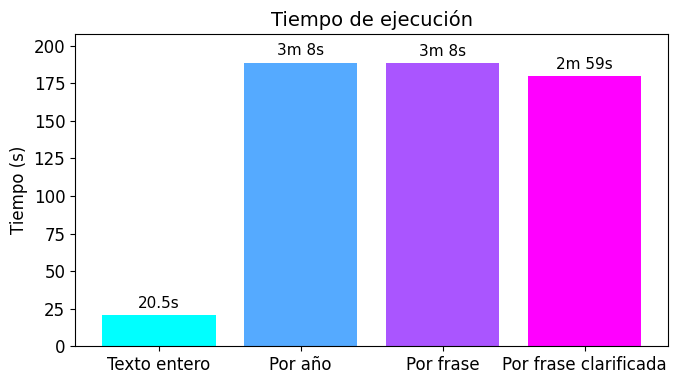

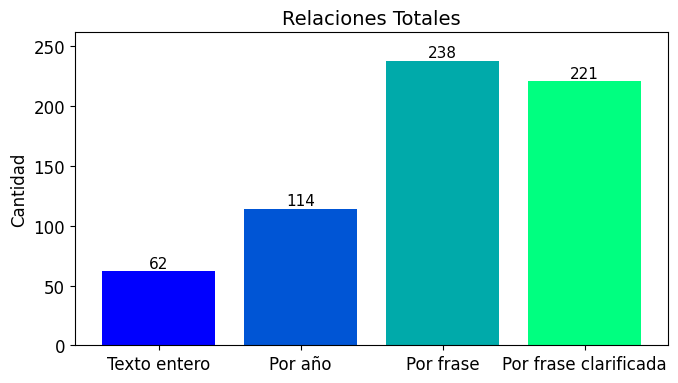

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
tiempos_supervisado = [20.5, 188.6, 188.3, 179.7]  # segundos
relaciones_supervisado = [62, 114, 238, 221]

# Función para formatear tiempo
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f}s"
    m = int(seconds // 60)
    s = int(seconds % 60)
    return f"{m}m {s}s"

# Colores
cmap_t = cm.get_cmap("cool", len(metodos))
colores_tiempo = [cmap_t(i) for i in range(len(metodos))]
cmap_r = cm.get_cmap("winter", len(metodos))
colores_relaciones = [cmap_r(i) for i in range(len(metodos))]

# --- Figura 1: Tiempo de ejecución ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, tiempos_supervisado, color=colores_tiempo)
plt.title("Tiempo de ejecución", fontsize=14)
plt.ylabel("Tiempo (s)", fontsize=12)
plt.ylim(0, max(tiempos_supervisado) * 1.1)
for i, t in enumerate(tiempos_supervisado):
    plt.text(i, t + 5, format_time(t), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/supervisado/supervisado_tiempo_ejecucion.png")
plt.show()

# --- Figura 2: Relaciones totales ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, relaciones_supervisado, color=colores_relaciones)
plt.title("Relaciones Totales", fontsize=14)
plt.ylabel("Cantidad", fontsize=12)
plt.ylim(0, max(relaciones_supervisado) * 1.1)
for i, r in enumerate(relaciones_supervisado):
    plt.text(i, r + 3, str(r), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/supervisado/supervisado_relaciones_totales.png")
plt.show()

## Simbolico

C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\156366115.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_t = cm.get_cmap("cool", len(metodos))
C:\Users\Victor\AppData\Local\Temp\ipykernel_20448\156366115.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_r = cm.get_cmap("winter", len(metodos))


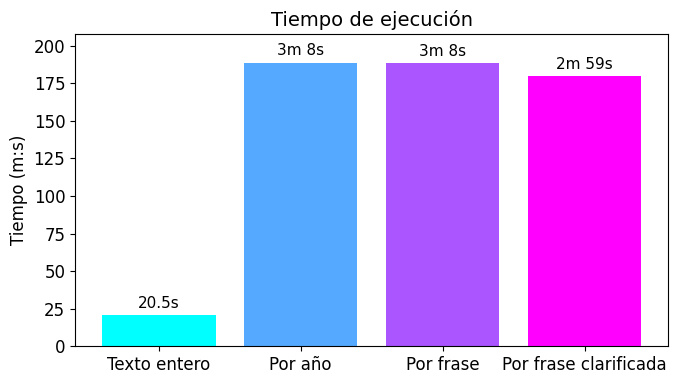

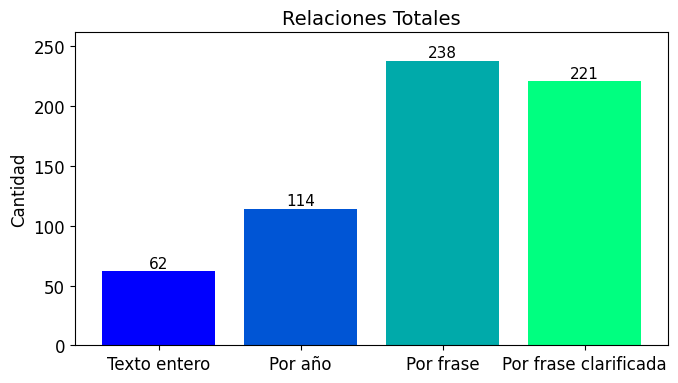

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
tiempos_simbolico = [20.5, 188.6, 188.3, 179.7]  # segundos
relaciones_simbolico = [62, 114, 238, 221]

# Función para formatear tiempo
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f}s"
    m = int(seconds // 60)
    s = int(seconds % 60)
    return f"{m}m {s}s"

# Colores
cmap_t = cm.get_cmap("cool", len(metodos))
colores_tiempo = [cmap_t(i) for i in range(len(metodos))]
cmap_r = cm.get_cmap("winter", len(metodos))
colores_relaciones = [cmap_r(i) for i in range(len(metodos))]

# --- Figura 1: Tiempo de ejecución ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, tiempos_simbolico, color=colores_tiempo)
plt.title("Tiempo de ejecución", fontsize=14)
plt.ylabel("Tiempo (m:s)", fontsize=12)
plt.ylim(0, max(tiempos_simbolico) * 1.1)
for i, t in enumerate(tiempos_simbolico):
    plt.text(i, t + 5, format_time(t), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/simbolico/simbolico_tiempo_ejecucion.png")
plt.show()

# --- Figura 2: Relaciones totales ---
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 12})
plt.bar(metodos, relaciones_simbolico, color=colores_relaciones)
plt.title("Relaciones Totales", fontsize=14)
plt.ylabel("Cantidad", fontsize=12)
plt.ylim(0, max(relaciones_simbolico) * 1.1)
for i, r in enumerate(relaciones_simbolico):
    plt.text(i, r + 3, str(r), ha='center', fontsize=11)
plt.tight_layout()
plt.savefig("../out/charts_generated/simbolico/simbolico_relaciones_totales.png")
plt.show()

# Gráfica de precisión, recall y f1score comparando todos los enfoques de prompting

## Prompting

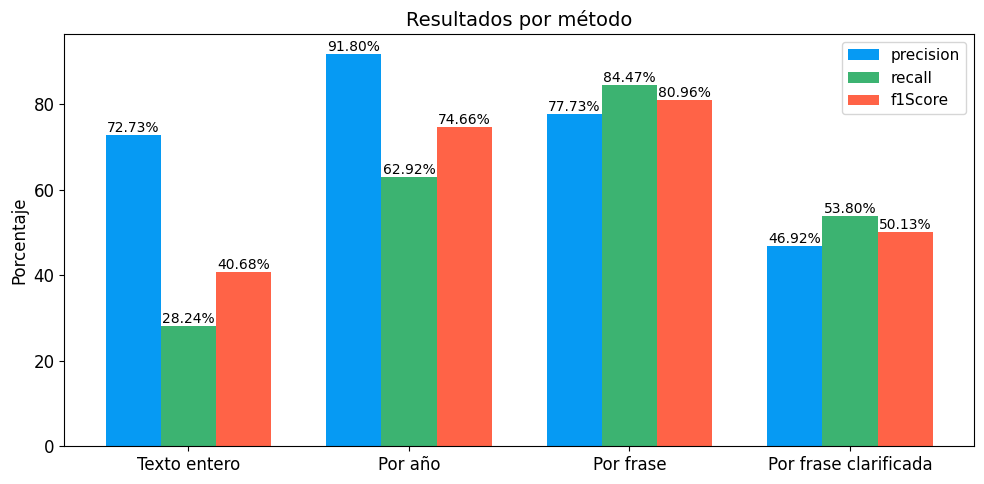

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
precision_scores_prompting = [72.73, 91.80, 77.73, 46.92]
recall_scores_prompting = [28.24, 62.92, 84.47, 53.80]
f1_scores_prompting = [40.68, 74.66, 80.96, 50.13]

# Posiciones de las barras
x = np.arange(len(metodos))
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 12})

# Gráfico de barras
bars1 = ax.bar(x - width, precision_scores_prompting, width, label='precision', color='xkcd:azure')
bars2 = ax.bar(x, recall_scores_prompting, width, label='recall', color='mediumseagreen')
bars3 = ax.bar(x + width, f1_scores_prompting, width, label='f1Score', color='tomato')

# Etiquetas y título
ax.set_ylabel('Porcentaje', fontsize=12)
ax.set_title('Resultados por método', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend(fontsize=11)

# Añadir valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../out/charts_generated/prompting/prompting_results_per_method.png")
plt.show()


## Supervisado

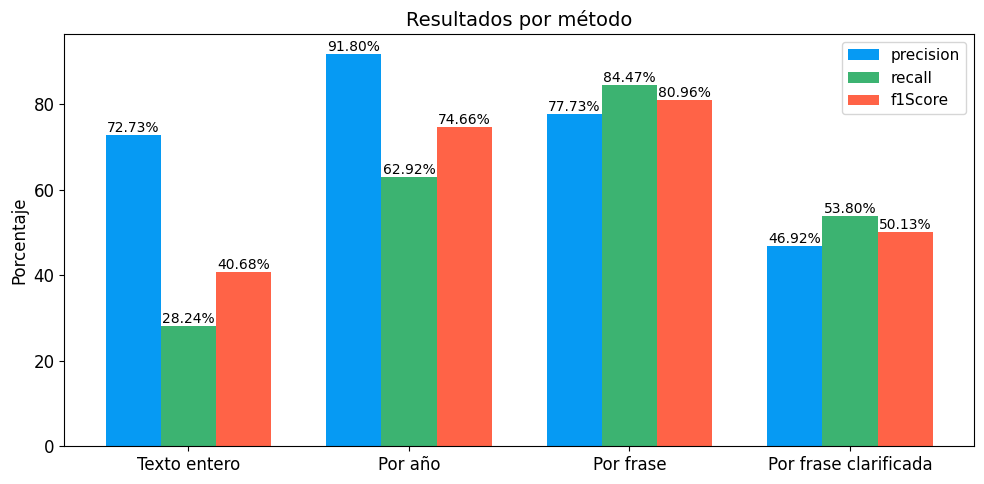

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
precision_scores_supervisado = [72.73, 91.80, 77.73, 46.92]
recall_scores_supervisado = [28.24, 62.92, 84.47, 53.80]
f1_scores_supervisado = [40.68, 74.66, 80.96, 50.13]

# Posiciones de las barras
x = np.arange(len(metodos))
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 12})

# Gráfico de barras
bars1 = ax.bar(x - width, precision_scores_supervisado, width, label='precision', color='xkcd:azure')
bars2 = ax.bar(x, recall_scores_supervisado, width, label='recall', color='mediumseagreen')
bars3 = ax.bar(x + width, f1_scores_supervisado, width, label='f1Score', color='tomato')

# Etiquetas y título
ax.set_ylabel('Porcentaje', fontsize=12)
ax.set_title('Resultados por método', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend(fontsize=11)

# Añadir valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../out/charts_generated/supervisado/supervisado_results_per_method.png")
plt.show()


## Simbolico

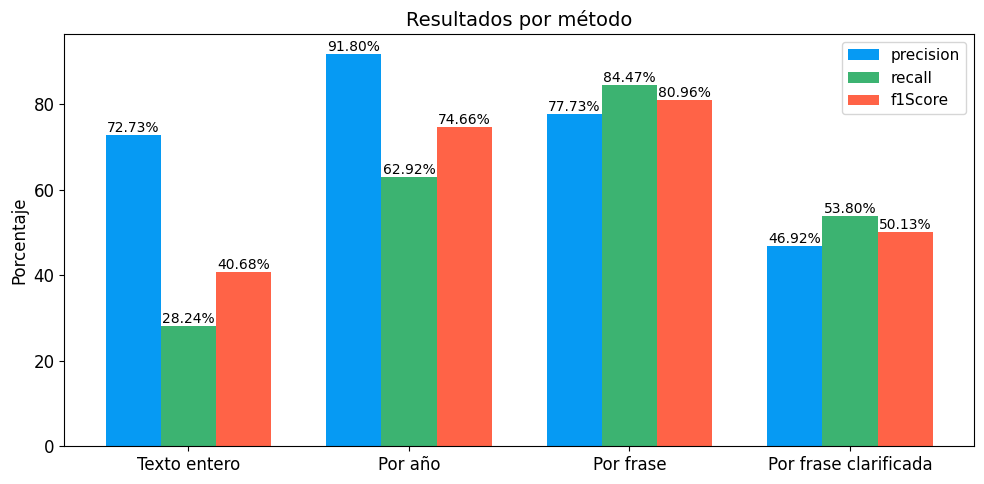

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
precision_scores_simbolico = [72.73, 91.80, 77.73, 46.92]
recall_scores_simbolico = [28.24, 62.92, 84.47, 53.80]
f1_scores_simbolico = [40.68, 74.66, 80.96, 50.13]

# Posiciones de las barras
x = np.arange(len(metodos))
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 12})

# Gráfico de barras
bars1 = ax.bar(x - width, precision_scores_simbolico, width, label='precision', color='xkcd:azure')
bars2 = ax.bar(x, recall_scores_simbolico, width, label='recall', color='mediumseagreen')
bars3 = ax.bar(x + width, f1_scores_simbolico, width, label='f1Score', color='tomato')

# Etiquetas y título
ax.set_ylabel('Porcentaje', fontsize=12)
ax.set_title('Resultados por método', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend(fontsize=11)

# Añadir valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../out/charts_generated/simbolico/simbolico_results_per_method.png")
plt.show()


# Gráfica comparando todos los modelos

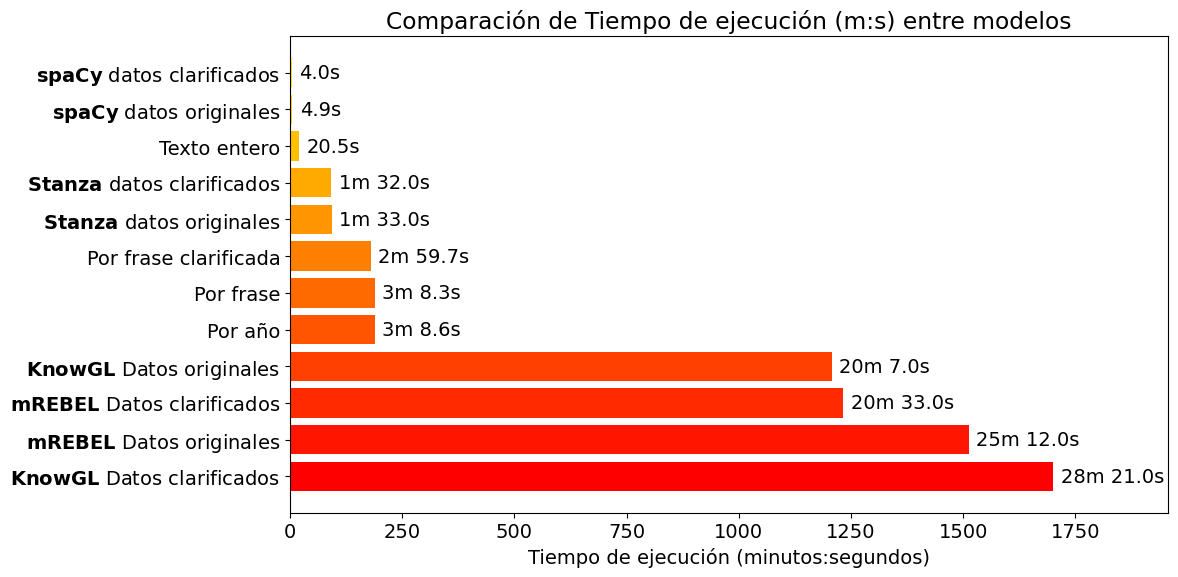

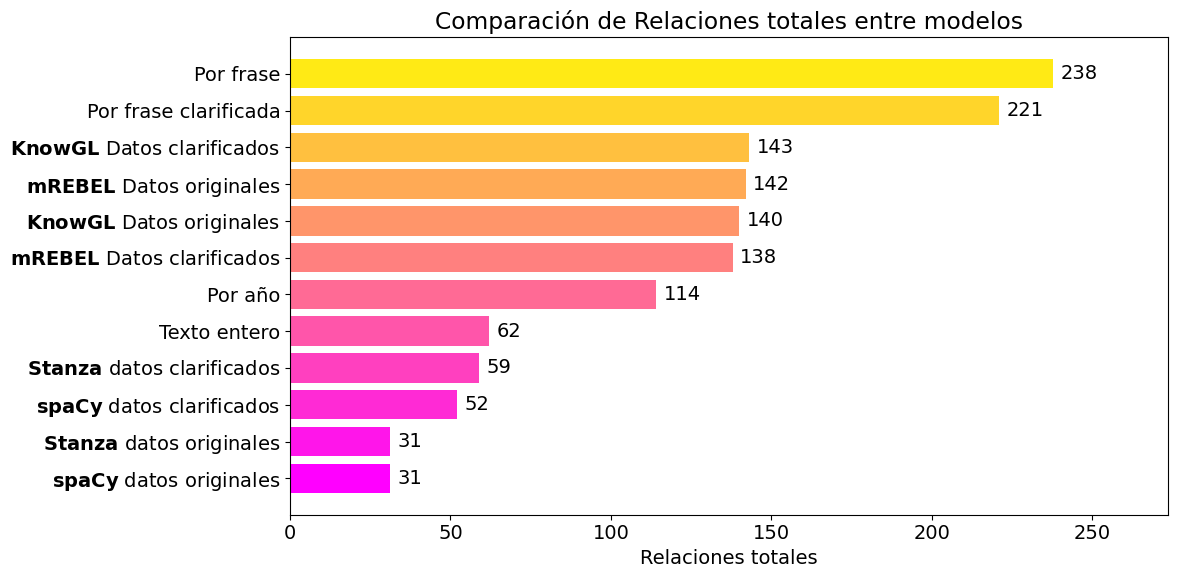

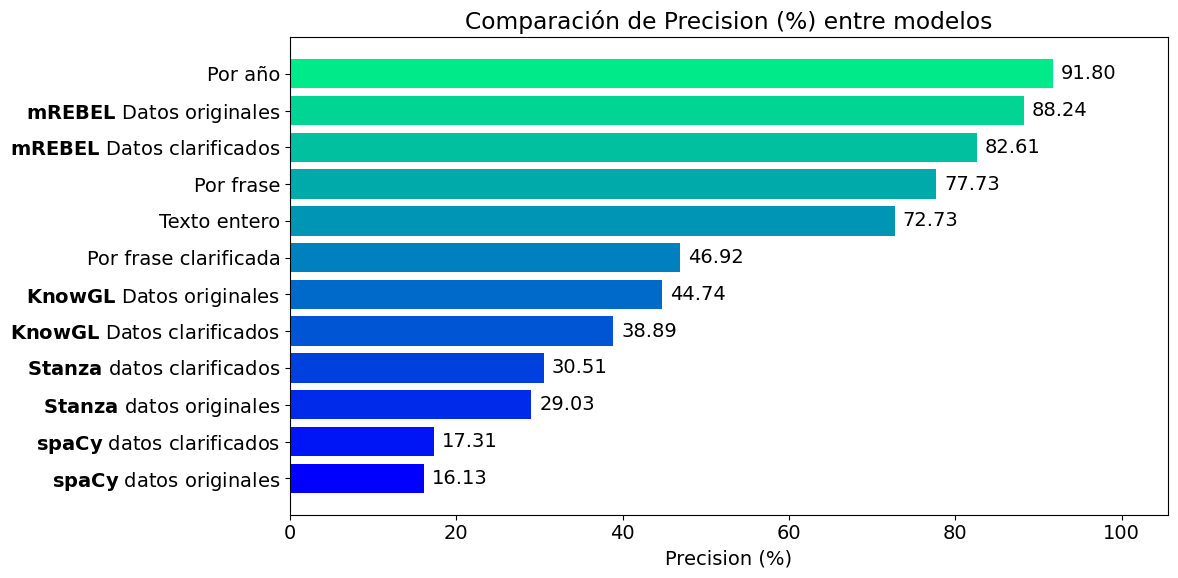

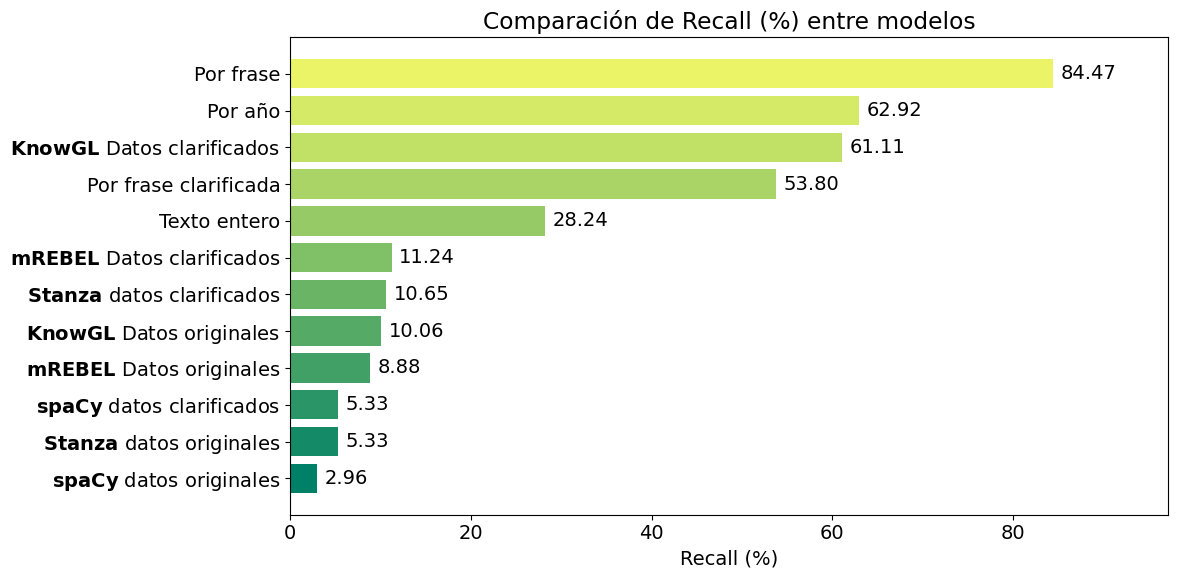

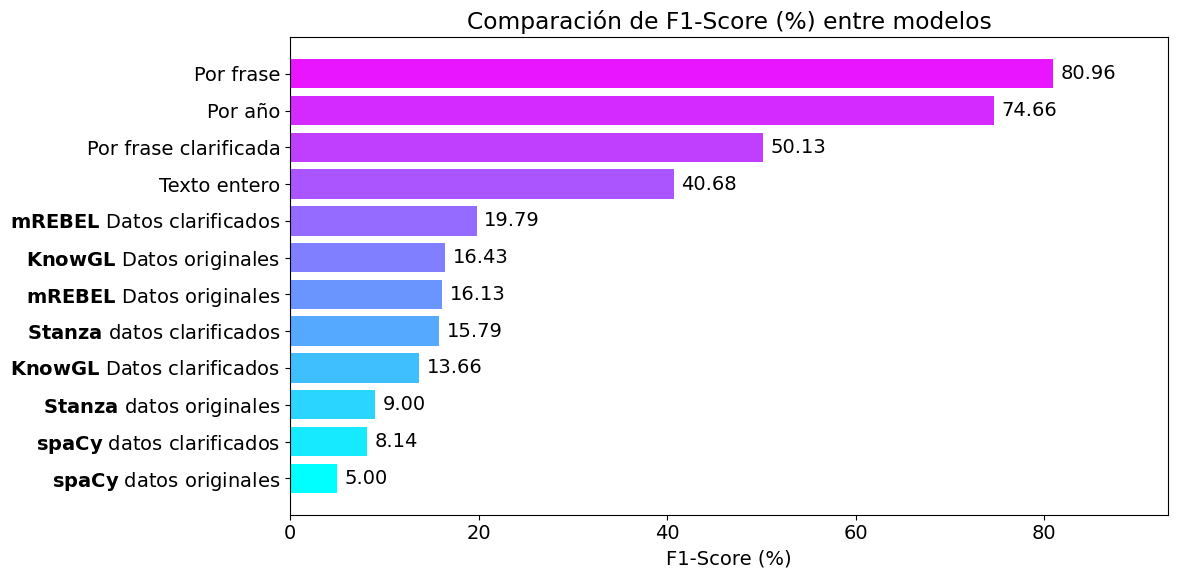

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

plt.rcParams['font.size'] = 14

# Datos
metodos = [
    r'$\mathbf{spaCy}$ datos originales', r'$\mathbf{Stanza}$ datos originales',
    r'$\mathbf{spaCy}$ datos clarificados', r'$\mathbf{Stanza}$ datos clarificados',
    r'$\mathbf{mREBEL}$ Datos originales', r'$\mathbf{KnowGL}$ Datos originales',
    r'$\mathbf{mREBEL}$ Datos clarificados', r'$\mathbf{KnowGL}$ Datos clarificados',
    'Texto entero', 'Por año', 'Por frase', 'Por frase clarificada'
]

# Conversión de tiempos a segundos aproximados
tiempos = [4.9, 93, 4.04, 92, 1512, 1207, 1233, 1701, 20.5, 188.6, 188.3, 179.7]
relaciones = [31, 31, 52, 59, 142, 140, 138, 143, 62, 114, 238, 221]
precision = [16.13, 29.03, 17.31, 30.51, 88.24, 44.74, 82.61, 38.89, 72.73, 91.80, 77.73, 46.92]
recall = [2.96, 5.33, 5.33, 10.65, 8.88, 10.06, 11.24, 61.11, 28.24, 62.92, 84.47, 53.80]
f1_score = [5.00, 9.00, 8.14, 15.79, 16.13, 16.43, 19.79, 13.66, 40.68, 74.66, 80.96, 50.13]

# Diccionario de métricas
metrics = {
    'Tiempo de ejecución (m:s)': tiempos,
    'Relaciones totales': relaciones,
    'Precision (%)': precision,
    'Recall (%)': recall,
    'F1-Score (%)': f1_score
}

metric2filename = {
    'Tiempo de ejecución (m:s)': 'tiempo_ejecucion',
    'Relaciones totales': 'relaciones_totales',
    'Precision (%)': 'precision',
    'Recall (%)': 'recall',
    'F1-Score (%)': 'f1_score'
}

def order_values(method_values: list[tuple[str, float | int]], metric: str) -> list[tuple[str, float | int]]:
    """Ordena los métodos por valores."""
    return sorted(method_values, key=lambda x: x[1], reverse=True if metric == 'Tiempo de ejecución (m:s)' else False)

# Colores personalizados para las barras
colores = [
    'autumn',
    'spring',
    'winter',
    'summer',
    'cool',
]

def format_time(seconds):
    """Convierte segundos a formato minutos:segundos."""
    minutes = int(seconds // 60)
    remaining_seconds = seconds % 60
    return f"{minutes}m {remaining_seconds:.1f}s" if minutes > 0 else f"{remaining_seconds:.1f}s"

# Crear las gráficas con valores sobre las barras y sin cortar etiquetas
for (metric, values), color in zip(metrics.items(), colores):
    plt.figure(figsize=(12, 6))
    
    ordered_method_values = order_values(list(zip(metodos, values)), metric)
    
    values = [value for _, value in ordered_method_values]
    sorted_methods = [method for method, _ in ordered_method_values]
    
    cmap = colormaps[color]  # Ejemplo de colormap categórico

    # Crear los índices para cada barra
    indices = np.arange(len(sorted_methods))
    bar_colors = cmap(indices / len(sorted_methods)) 
    
    bars = plt.barh(sorted_methods, values, color=bar_colors)
    plt.xlabel(metric if metric != 'Tiempo de ejecución (m:s)' else 'Tiempo de ejecución (minutos:segundos)')
    plt.title(f'Comparación de {metric} entre modelos')

    # Añadir los valores en cada barra
    for bar, value in zip(bars, values):
        width = bar.get_width()
        label = format_time(value) if metric == 'Tiempo de ejecución (m:s)' else f'{width:.2f}' if metric != 'Relaciones totales' else str(int(width))
        plt.text(width + max(values) * 0.01, bar.get_y() + bar.get_height() / 2,
                 label, va='center')

    # Asegurar que el límite del eje X sea suficiente para mostrar todas las etiquetas
    plt.xlim(0, max(values) * 1.15)
    plt.tight_layout()
    plt.savefig(f"../out/charts_generated/general_comparative/general_{metric2filename[metric]}.png")
    plt.show()
